In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

sns.set(style="darkgrid")
rng = np.random.default_rng(seed=None)

# In case we need many colors
palette = sns.color_palette(cc.glasbey, n_colors=54)

Import the merged training data.

In [19]:
X = pd.read_csv('../data/merged_train_alt_new.csv') 
    # null values occur for missing holiday/event names, if none happen that day (columns 15, 17, 19, 21)
    # or for missing boolean value for 'transferred' (if there is no holiday happening)

/var/folders/26/840b8l353yv58xh3z45hs1tc0000gn/T/ipykernel_68840/3273872294.py:1: DtypeWarning: Columns (15,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv('../data/merged_train_alt_new.csv')


# Preprocessing

We break down the DataFrame in a number of different ways (useful for plotting).

- `store_num`: Dictionary with data broken down by store number, e.g. use `store_num[1]` to access data for store 1.
- `X_year`: Dictionary with data borken down by year, e.g. use `X_year[2013]` to access 2013 data.
- `sample_stores`: list containing 5 "different" kinds of stores of different types.

We also make auxiliary lists containing store information in order:
- `store_numbers`: range(1,55) for indexing
- `store_type`: the store type of each store in order
- `store_cluster`: the cluster of each store in order

In [20]:
# List of store numbers 1-54 for indexing
store_numbers = [ i for i in range(1,55)]

# Create a dictionary separating data by store number
store_num = {}
for i in store_numbers:
    store_num[i] = X[ X.store_nbr == i ]

# Create lists to track store type and cluster (use to hue scatter plots)
store_type      = [ store_num[i].type.unique()[0] for i in store_numbers ]
store_cluster   = [store_num[i].cluster.unique()[0] for i in store_numbers]

### By Year

In [61]:
X_year = {}

for year in X.year.unique():
    X_year[year] = X[ X.year == year ]

### By Product Family

In [75]:
X.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [74]:
X_family = {}

for family in X.family.unique():
    X_family[family] = X[ X.family == family ]

### Sample Stores

Instead of plotting all 54 stores or a selection of random stores, we choose one store of each type, using the observation from 'Mean sales by store' section, to ensure the stores are different enough, and representative of their store types.

In [21]:
sample_stores = [49, 39, 12, 27, 36]
sample_stores_colors = ['m','orange','g','r','b']
sample_stores_type = ['A', 'B', 'C', 'D', 'E']

### August Data

Here we focus solely on data for August.

In [22]:
aug_X = X[ X.month == 8 ]

aug_store_num = {}

for i in store_numbers:
    aug_store_num[i] = aug_X[ aug_X.store_nbr == i ]

### Lists for Axis Labels

In [129]:
# Gives '2013 Week 1', ...,  '2013 Week 52', '2014 Week 1', etc.
week_list = [ f'{2013+n//52} Week {n%52}' for n in range(1,245)]

trimonthly_month_by_week_number = {1:'Jan', 53:'Jan', 105:'Jan',157:'Jan',209:'Jan',
                                   14:'Apr', 66:'Apr', 118:'Apr', 170:'Apr', 222:'Apr',
                                   27:'Jul', 79:'Jul', 131:'Jul', 183:'Jul', 235:'Jul',
                                   40:'Oct', 92:'Oct', 144:'Oct', 196:'Oct'}

# Functions used to generate plots

In [79]:
def oil_over_time():
    # cleaning oil, copied from Cleaning notebook
    oil = pd.read_csv('../data/oil.csv')
    oil = oil.rename({'dcoilwtico': 'oil'}, axis=1)
    oil.iloc[0,1] = 92.485   
    date_range = pd.date_range(start='1/1/2013', end='8/31/2017',freq='D')
    dates = pd.DataFrame(date_range, columns=['date'])
    oil['date'] = pd.to_datetime( oil['date'] )
    oil = dates.merge(oil,how='left', on='date')
    oil['oil'] = oil['oil'].interpolate()
    
    
    plt.figure(figsize=(15,5))
    sns.scatterplot(x=oil.date, y=oil.oil)

    plt.title('Daily Oil Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Oil Price')

    date_range_2M = pd.date_range(start='1/1/2013', end='8/31/2017',freq='2MS')
    
    plt.xticks(ticks=date_range_2M,rotation=90)
        
    plt.show()


In [24]:
def mean_sales_by_store():
    mean_sales = [store_num[i].sales.mean() for i in store_numbers]

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    sns.scatterplot(x=store_numbers, y=mean_sales, hue=store_type)

    # Format title and axes
    plt.title('Mean Sales by Store Number')
    plt.xlabel('Store Number')
    plt.ylabel('Mean Sales')

    plt.xticks(ticks=store_numbers, labels=store_numbers)
    plt.yticks(ticks=[100*i for i in range(12)], labels=[100*i for i in range(12)])

    # Display the plot
    plt.show()

In [25]:
def mean_sales_by_store_type():

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    plt.bar(x=X.groupby('type').sales.mean().index,
            height=X.groupby('type').sales.mean().values,
            color=['m','orange','g','b','r'])

    # Format title and axes
    plt.title('Mean Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('Mean Sales')

    # Display the plot
    plt.show()

In [26]:
def aug_mean_sales_by_store():
    aug_mean_sales = [aug_store_num[i].sales.mean() for i in store_numbers]

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    sns.scatterplot(x=store_numbers, y=aug_mean_sales, hue=store_type)

    # Format title and axes
    plt.title('August Mean Sales by Store Number')
    plt.xlabel('Store Number')
    plt.ylabel('August Mean Sales')

    plt.xticks(ticks=store_numbers, labels=store_numbers)
    plt.yticks(ticks=[100*i for i in range(12)], labels=[100*i for i in range(12)])

    # Display the plot
    plt.show()

In [27]:
def aug_mean_sales_by_store_type():

    fig = plt.figure(figsize=(15,5))

    # Plot mean sales by store
    plt.bar(x=aug_X.groupby('type').sales.mean().index,
            height=aug_X.groupby('type').sales.mean().values,
            color=['m','orange','g','b','r'])

    # Format title and axes
    plt.title('August Mean Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('August Mean Sales')

    # Display the plot
    plt.show()

In [28]:
def sample_sales_vs_transactions():
    for i in sample_stores:
        j = sample_stores.index(i)
        
        fig = plt.figure(figsize=(10,5))

        plt.scatter(store_num[i].groupby('date').sales.sum(),
                    store_num[i].groupby('date').transactions.sum(),
                    color=sample_stores_colors[j], 
                    alpha=.3)

        plt.title(f'Sales vs. Transactions (Store {i} Type {sample_stores_type[j]})')
        plt.xlabel('Total Sales')
        plt.ylabel('Total Transactions')

In [ ]:
def oil_vs_sales():
    fig = plt.figure(figsize=(10,5))
    
    plt.title(f'Sales vs. Oil Prices')
    plt.xlabel('Oil Price')
    plt.ylabel('Total Sales')
    
    for year in X.year.unique():
        plt.scatter(X_year[year].groupby('date').oil.mean(),
                    X_year[year].groupby('date').sales.sum(),
                    alpha=0.3)

    plt.legend()
    plt.show()

In [ ]:
def promotions_vs_sales():
    fig = plt.figure(figsize=(10,5))
    
    plt.title('Sales vs. Number of Items on Promotion')
    plt.xlabel('Number of Items on Promotion')
    plt.ylabel('Total Sales')
    
    for year in X.year.unique():
        plt.scatter(X_year[year].groupby('date').onpromotion.sum(),
                    X_year[year].groupby('date').sales.sum(),
                    alpha=0.3)

    plt.show()

In [134]:
def mean_weekly_sales_by_family():
    
    date_range_4M = pd.date_range(start='1/1/2013', end='8/31/2017',freq='4MS')
    
    for family in X.family.unique():
        fig = plt.figure(figsize=(15,5))
    
        plt.title(f'Mean weekly sales for {family.lower()} products')
        plt.xlabel('Date')
        plt.ylabel('Mean weekly sales')
        
        plt.scatter(range(1,245),
                    X_family[family].groupby(['year','week_number']).sales.mean(),
                    alpha=0.3)

        plt.xticks(ticks=np.arange(1,245,13),
                   labels=[f'{trimonthly_month_by_week_number[n]}-{2013+n//52}' for n in np.arange(1,245,13)],
                   rotation=45)    
        plt.show()

# Data Analysis

### Oil prices over time

For the purposes of predicting sales, the only thing of note here is that the oil prices seem to comfortably lie in the $40-50$ range. However, out oil data includes oil prices for the testing set, so we have no use for this.

Another observation: oil price seems to have a degree of seasonality, with seasons being around 2 months long.

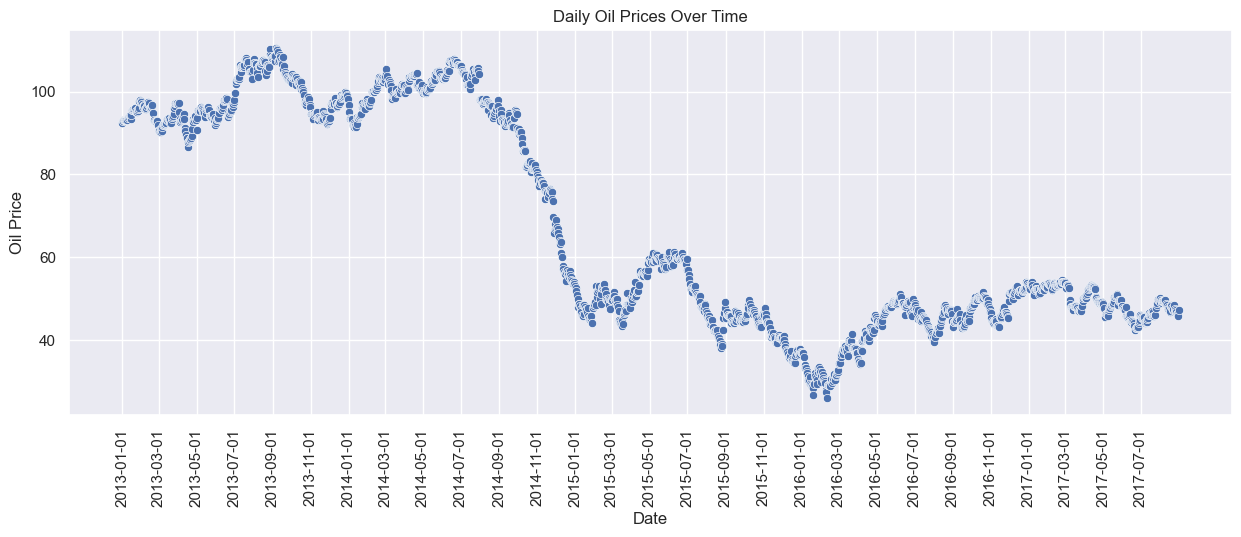

In [80]:
oil_over_time()

### Mean sales by store

The "store type" has some effect on sales.
-  `type=A` stores by far have the most sales. 
- `type=B` stores most commonly have sales around $400\pm 100$.
- `type=C` stores most commonly have sales around $200\pm 100$.
- `type=D` stores exhibit the most variance in terms of mean sales.
- `type=E` stores *all* have sales around $310$.

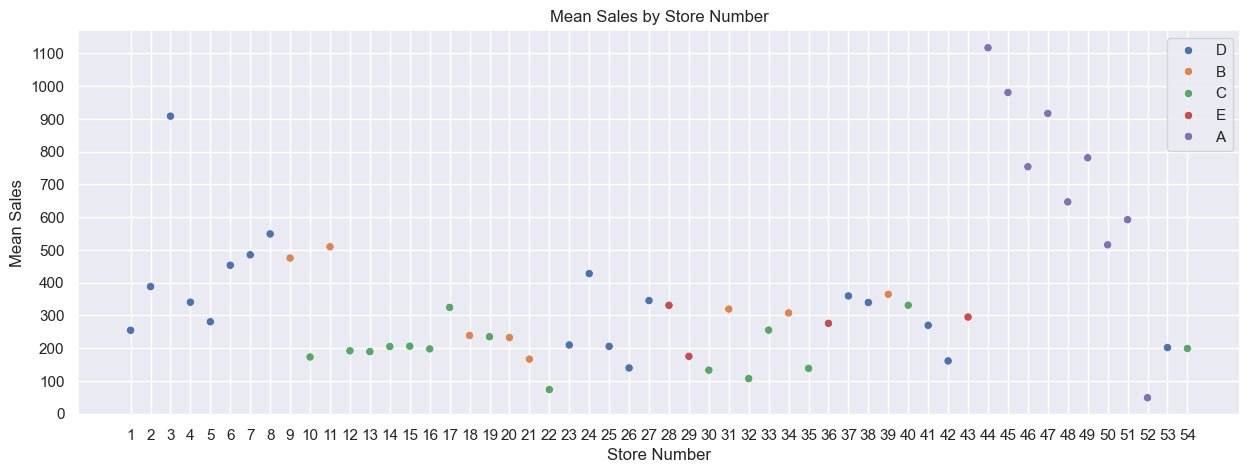

In [31]:
mean_sales_by_store()   # hue is by store type  

type
A    705.878743
B    326.739714
C    197.263301
D    350.979407
E    269.121301
Name: sales, dtype: float64


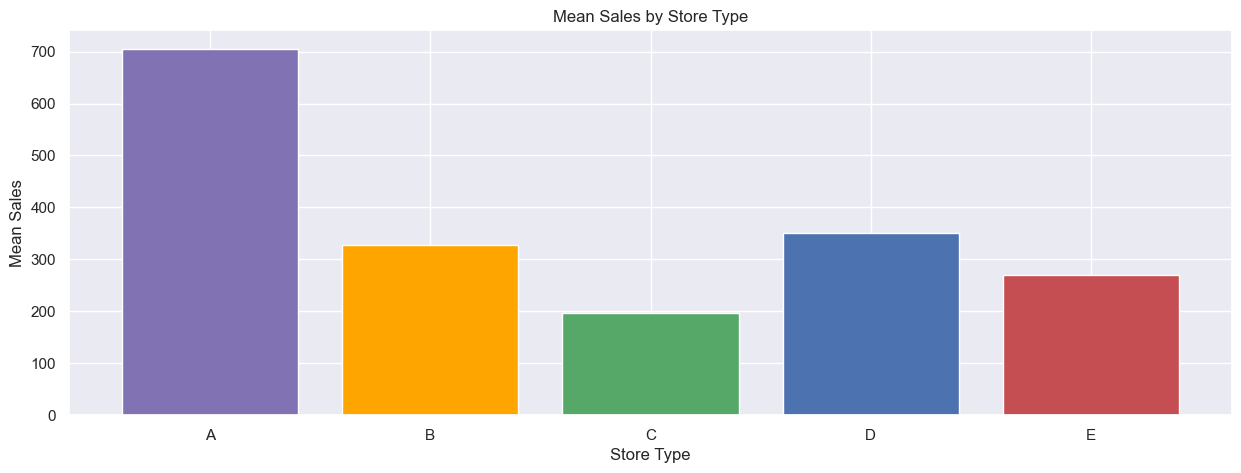

In [32]:
print(X.groupby('type').sales.mean())
mean_sales_by_store_type()

### August sales by store

- In general, the August mean sales seem to more or less match the yearly mean sales.
- For all store_types except E, the sales in August are slightly lower than average.

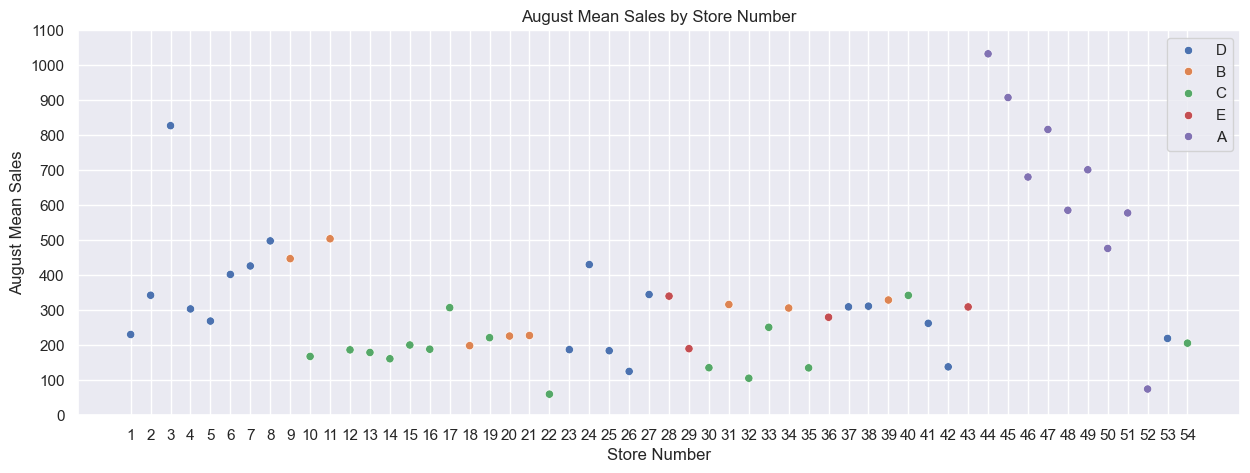

In [33]:
aug_mean_sales_by_store()

type
A    650.475736
B    319.594519
C    190.075727
D    323.074800
E    280.019199
Name: sales, dtype: float64


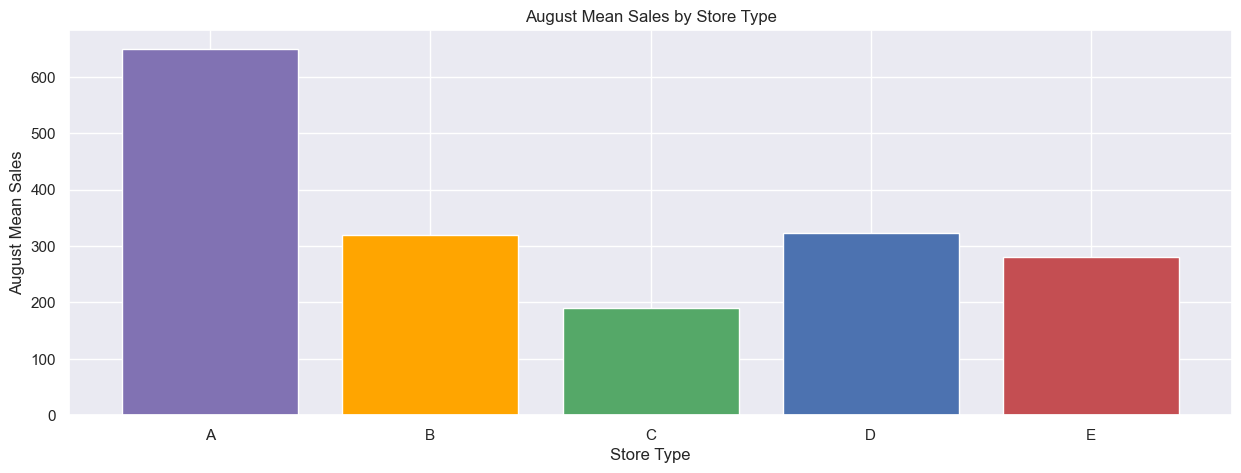

In [34]:
print(aug_X.groupby('type').sales.mean())
aug_mean_sales_by_store_type()

### Transactions vs. Sales

For our sample stores, we plot total transactions against total sales for each day. Although it's not completely clear exactly what `transaction` is tracking, we expected it to be positively correlated with sales. 

Interestingly, most of the sample stores seem to be *two* best fit lines

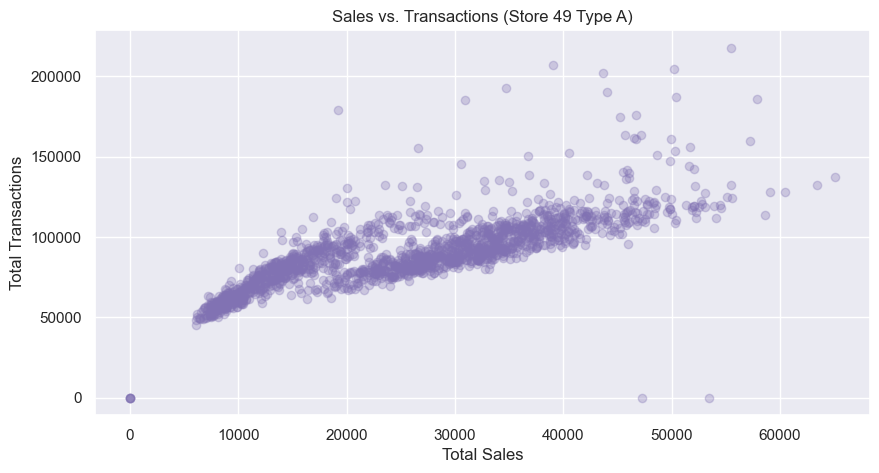

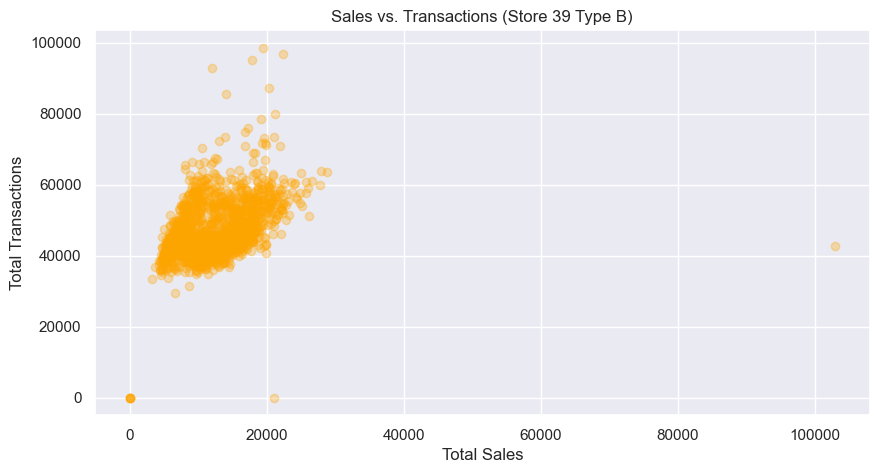

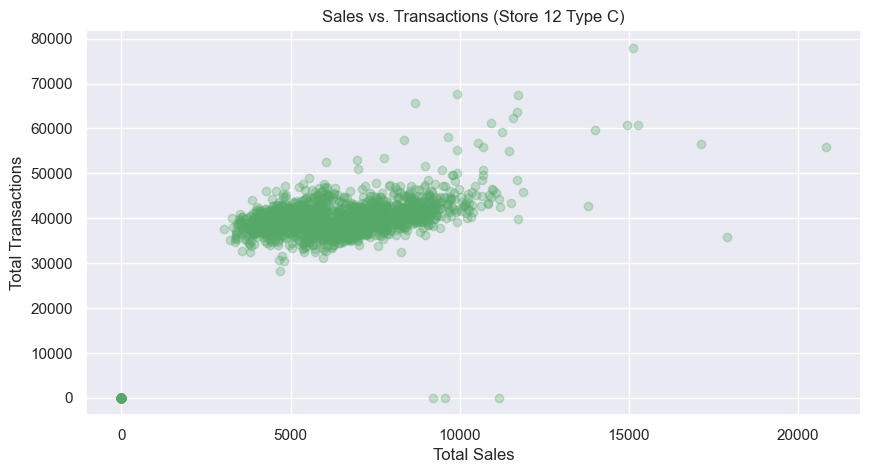

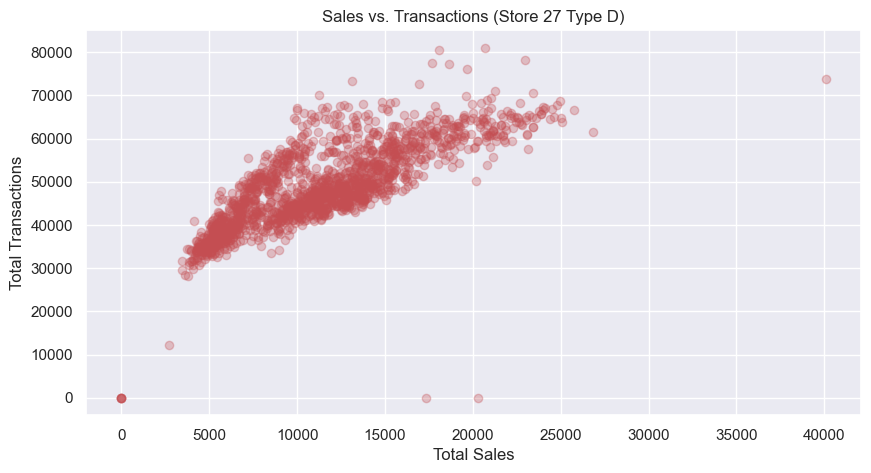

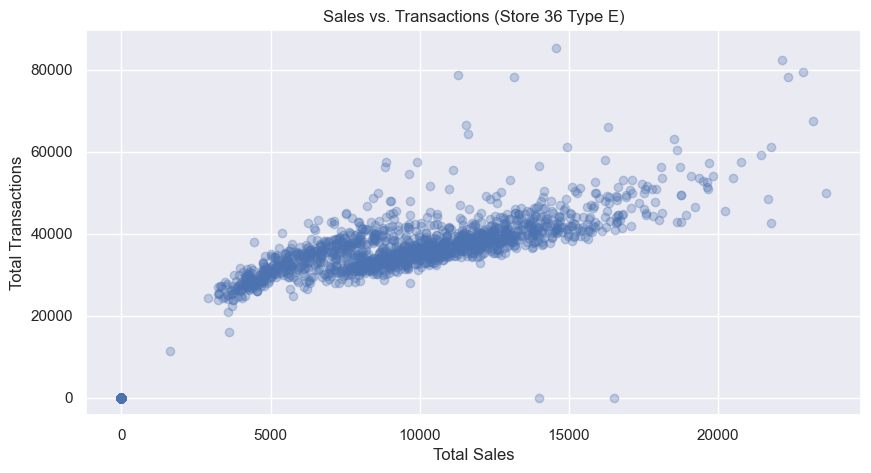

In [35]:
sample_sales_vs_transactions()

### Oil vs. Sales

There is a slight increase in sales over the years, along with a drop in oil prices over the years.

/var/folders/26/840b8l353yv58xh3z45hs1tc0000gn/T/ipykernel_68840/1154313454.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


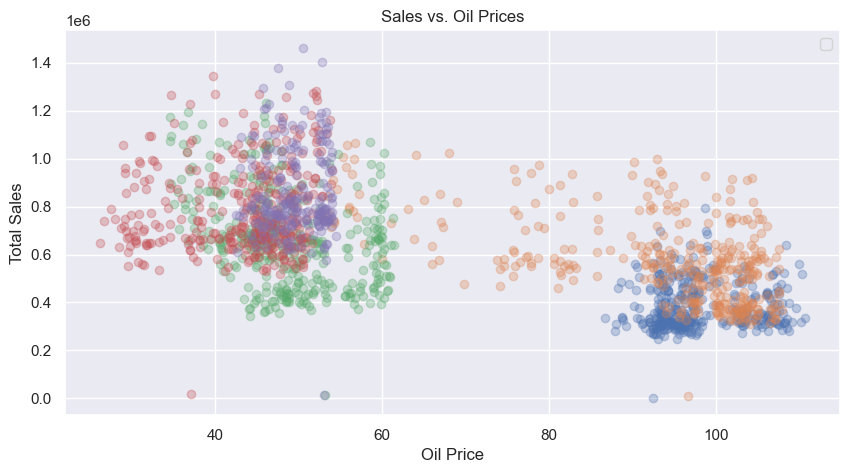

In [66]:
oil_vs_sales()

### Promotions vs. Sales

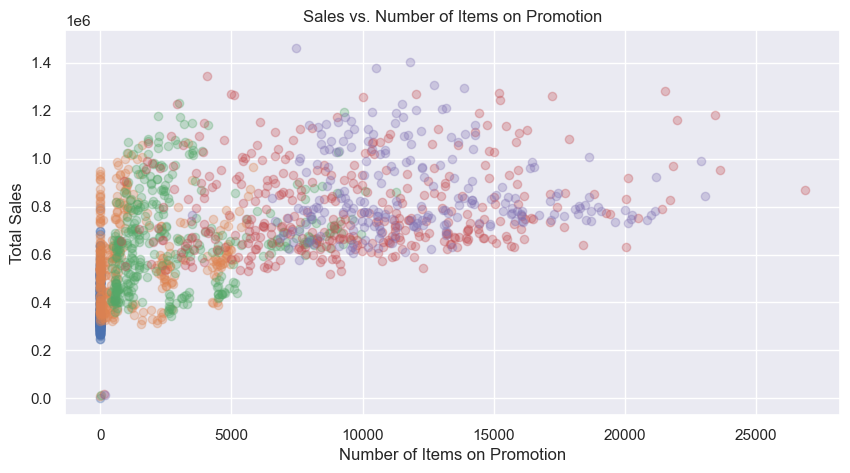

In [ ]:
promotions_vs_sales()   #hued by year

### Mean weekly sales by product family

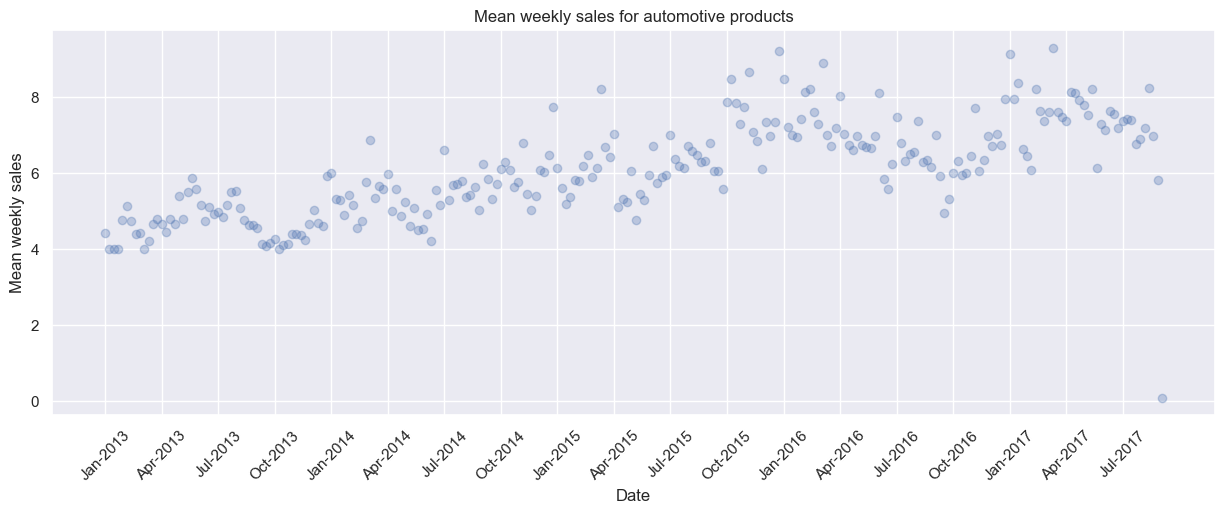

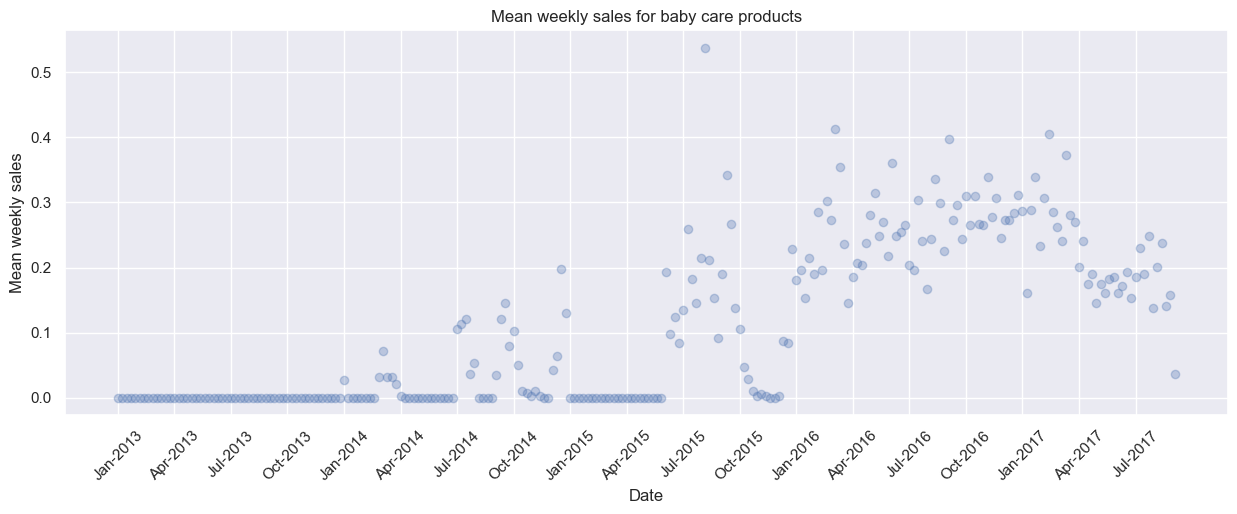

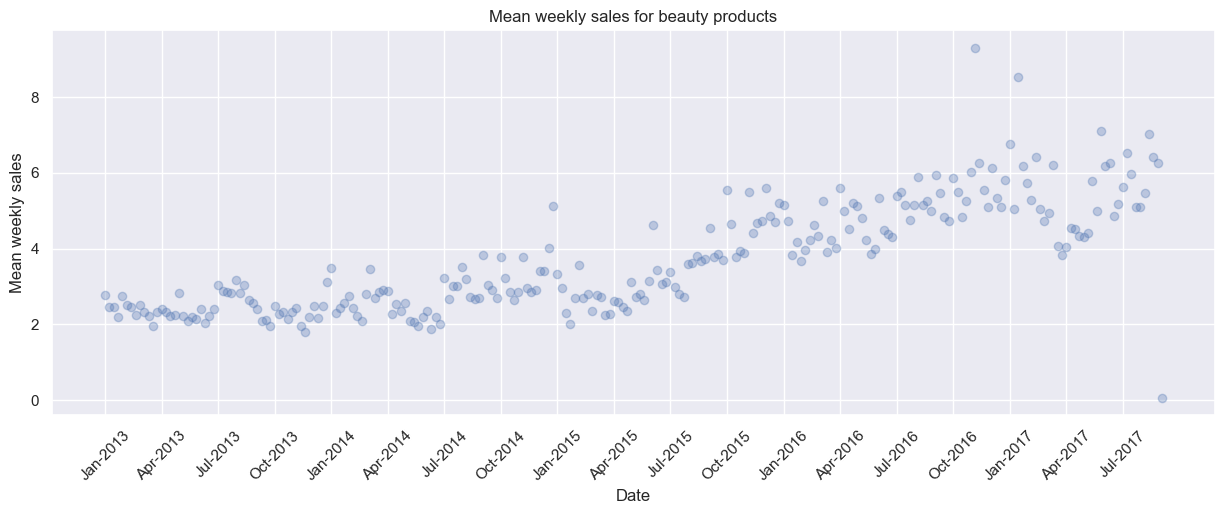

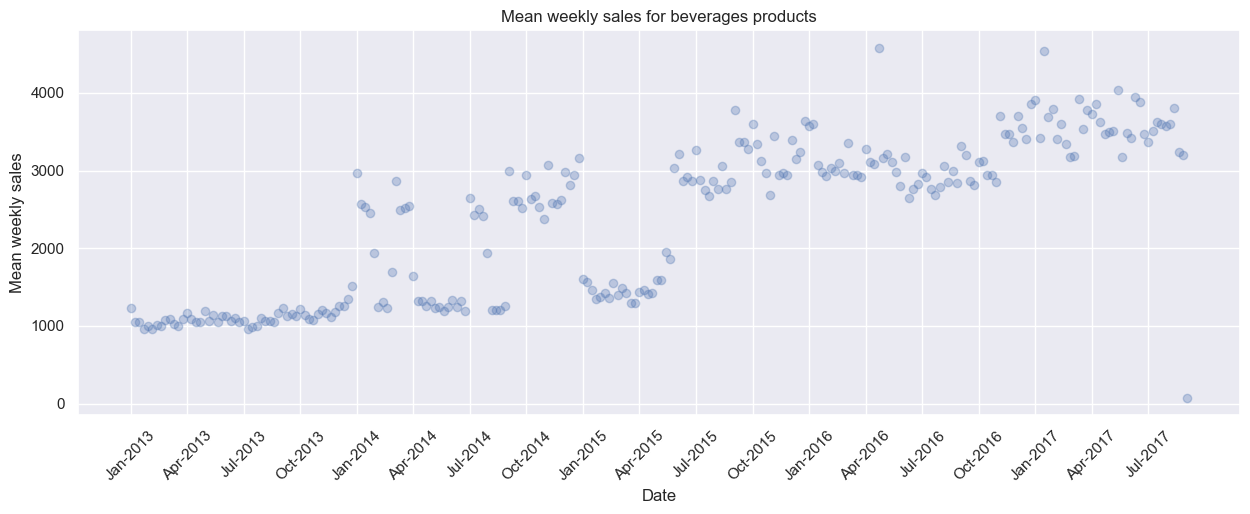

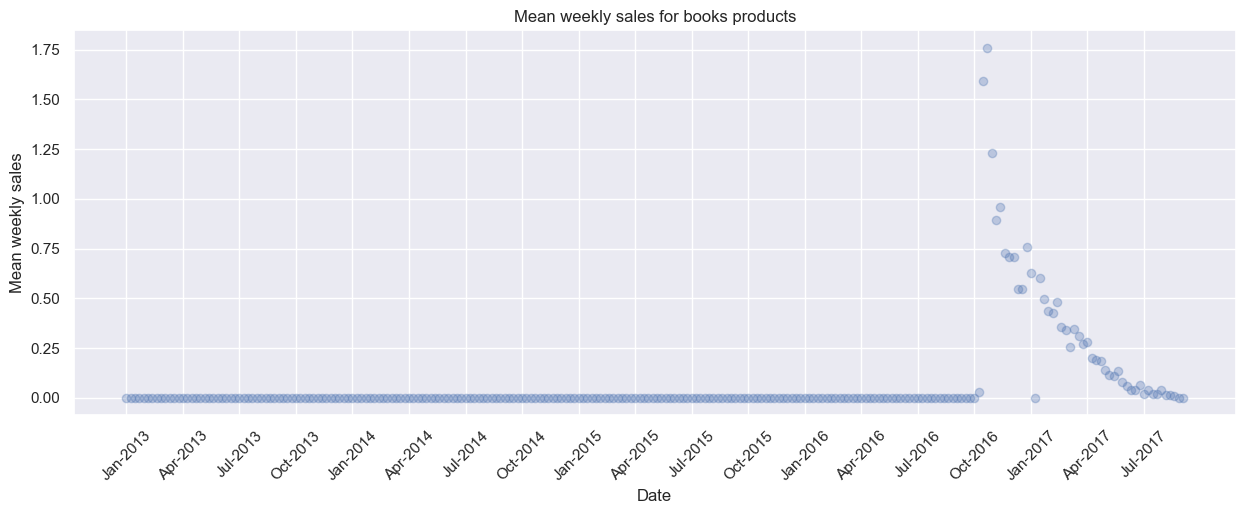

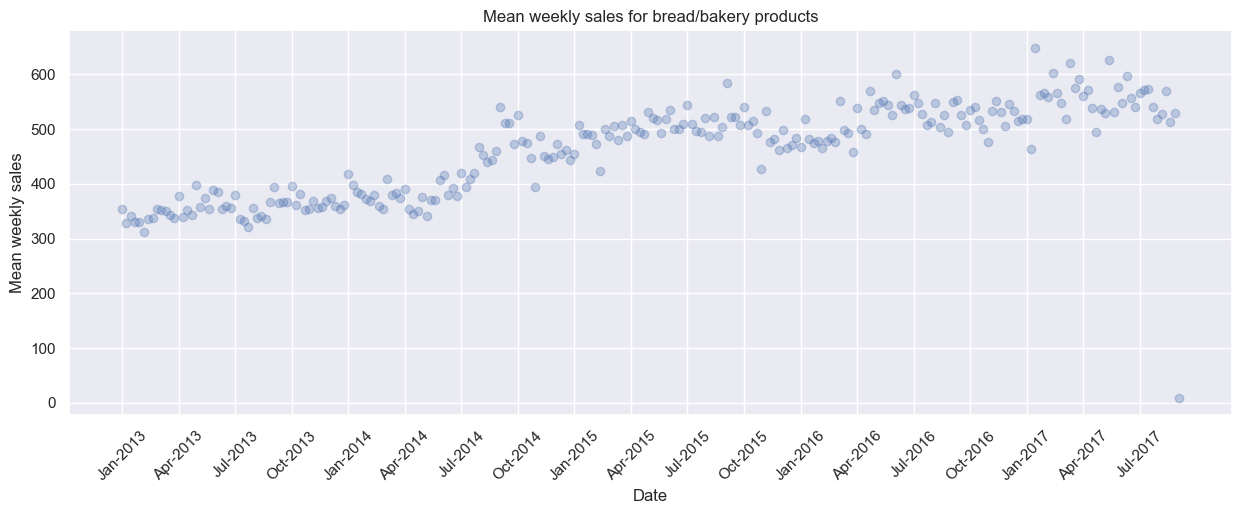

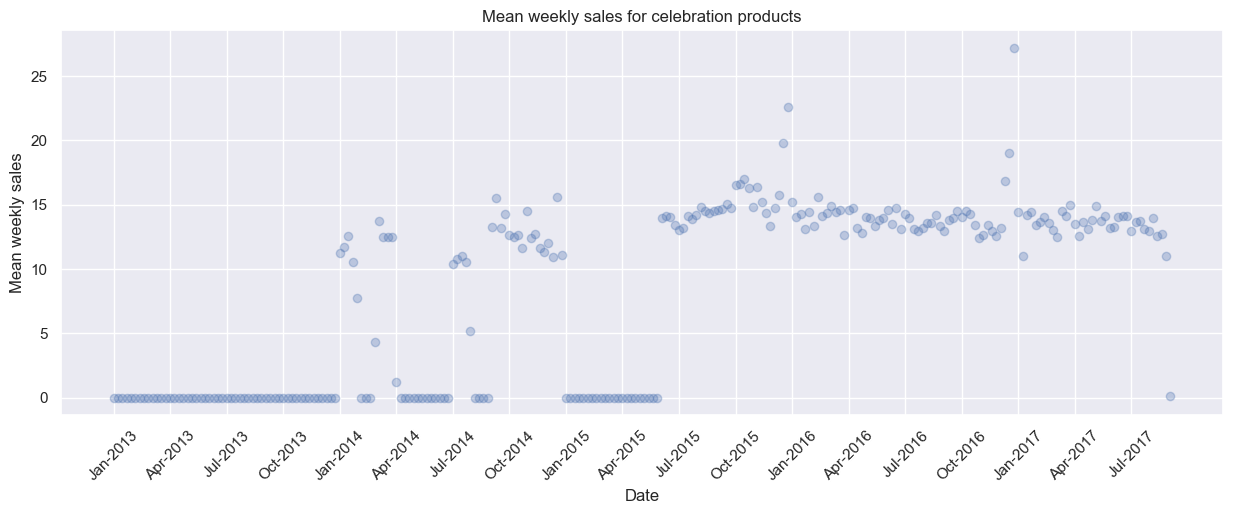

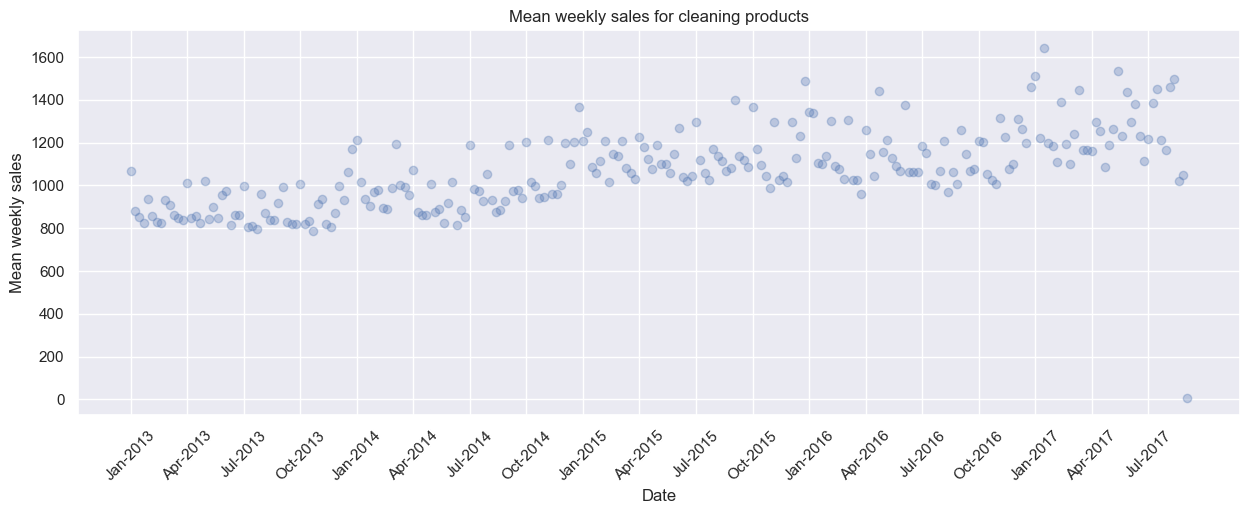

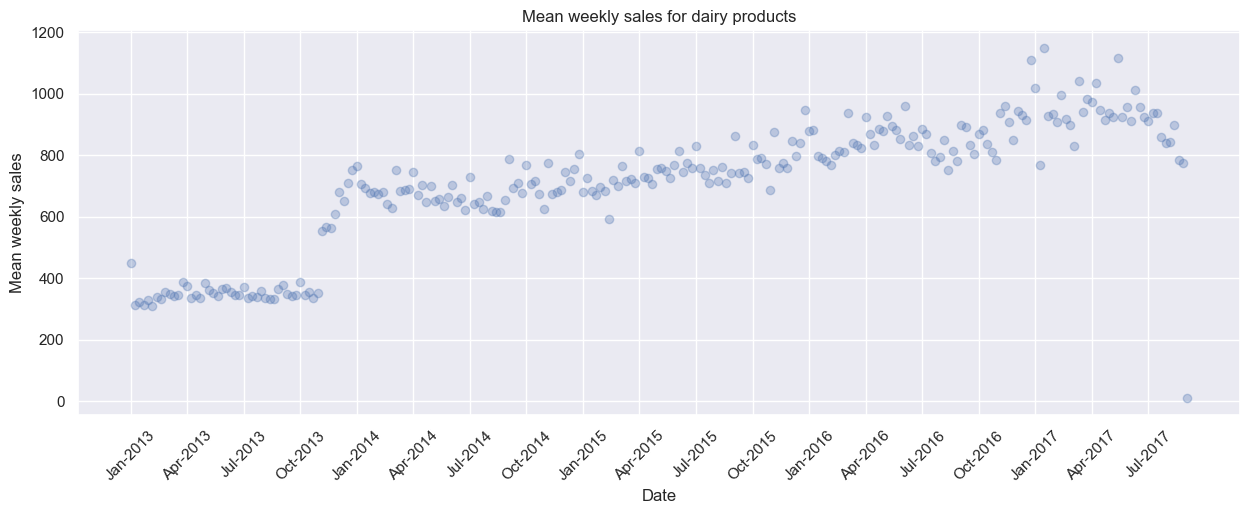

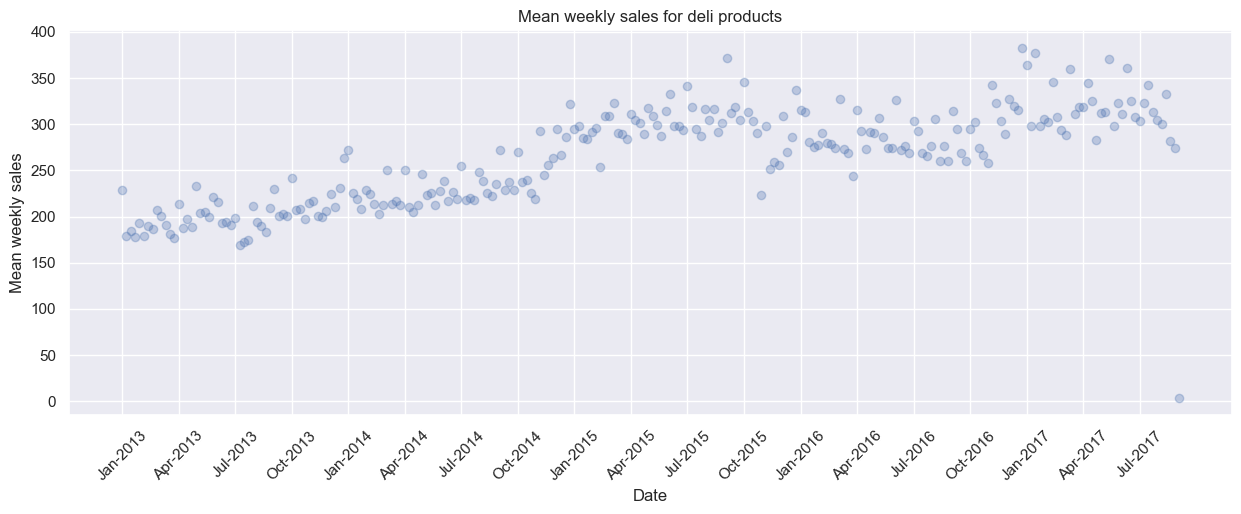

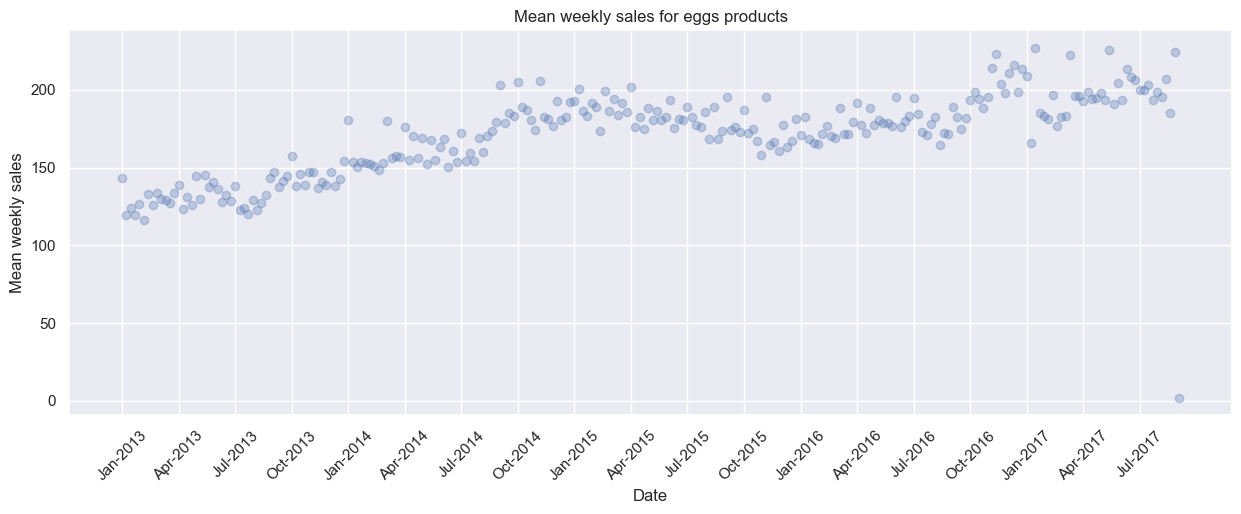

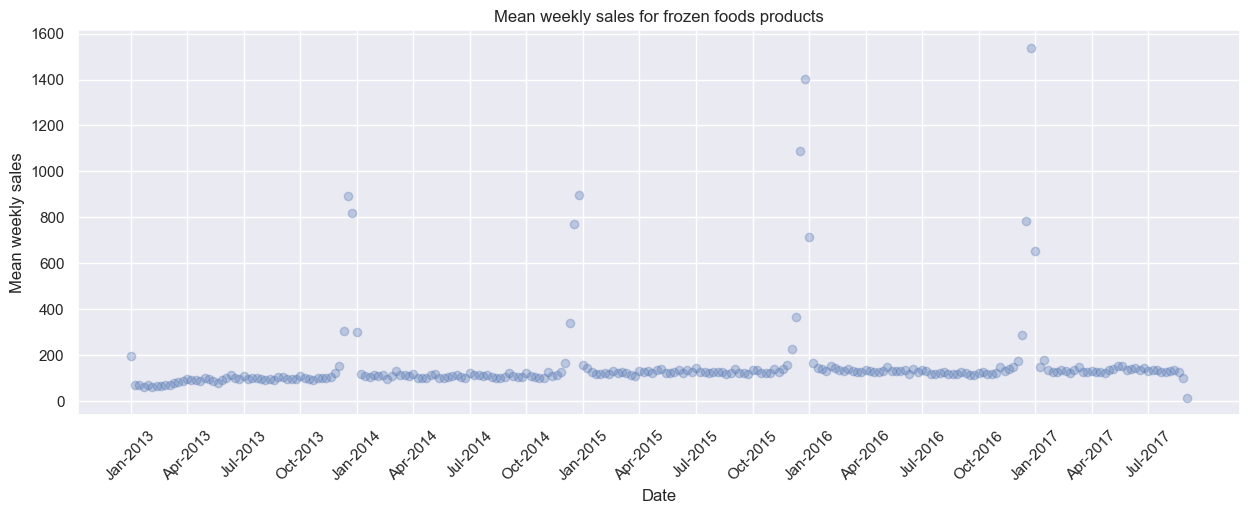

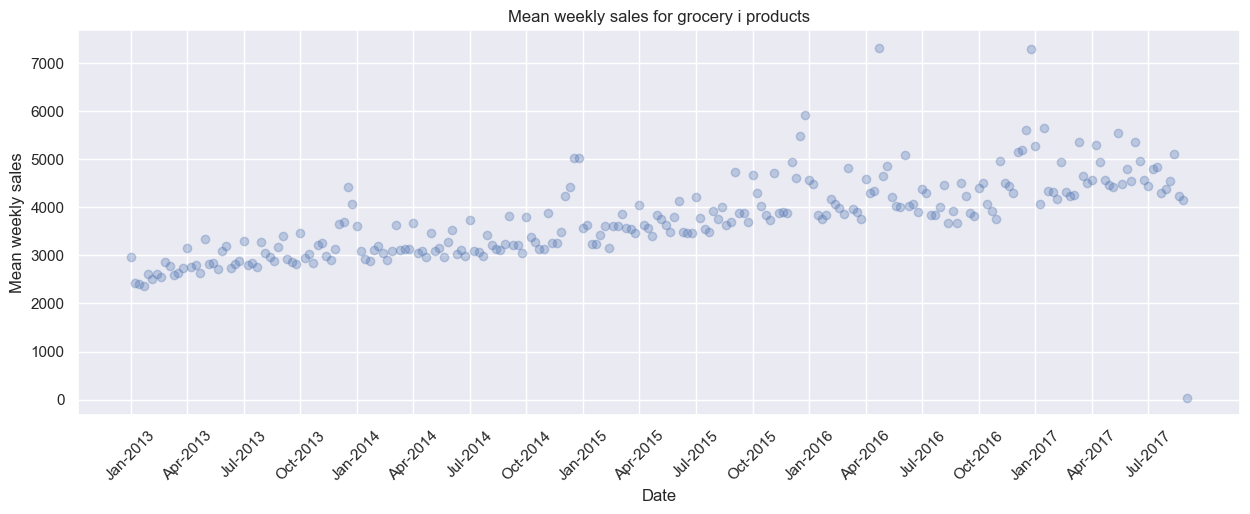

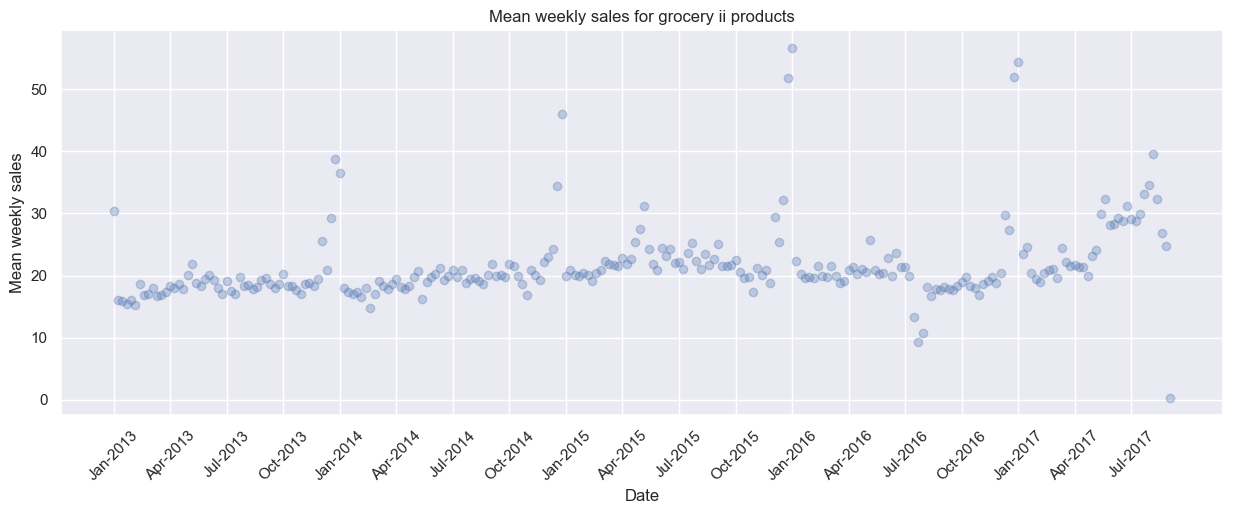

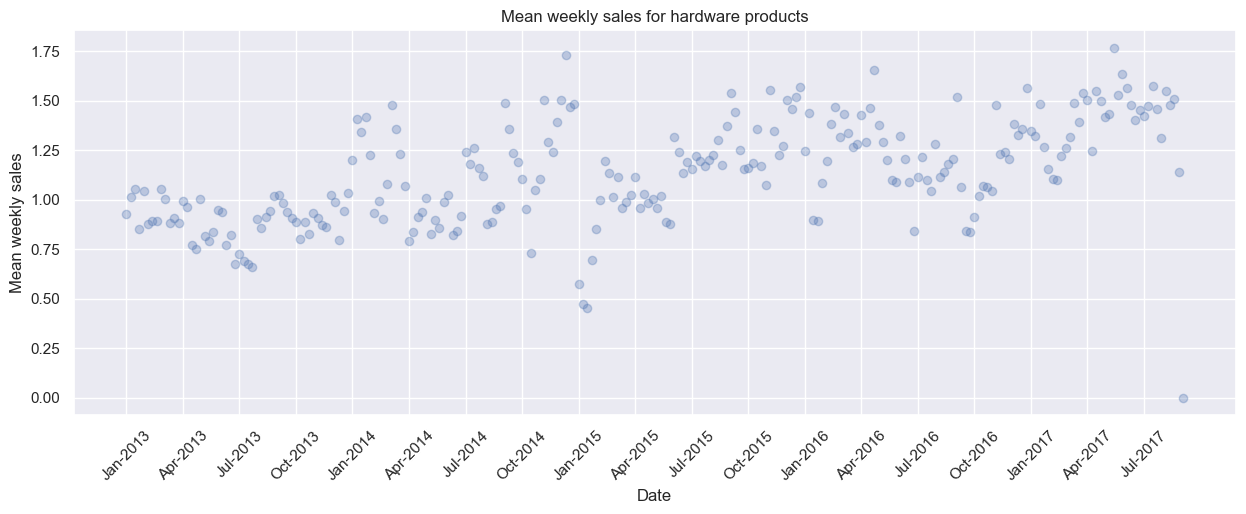

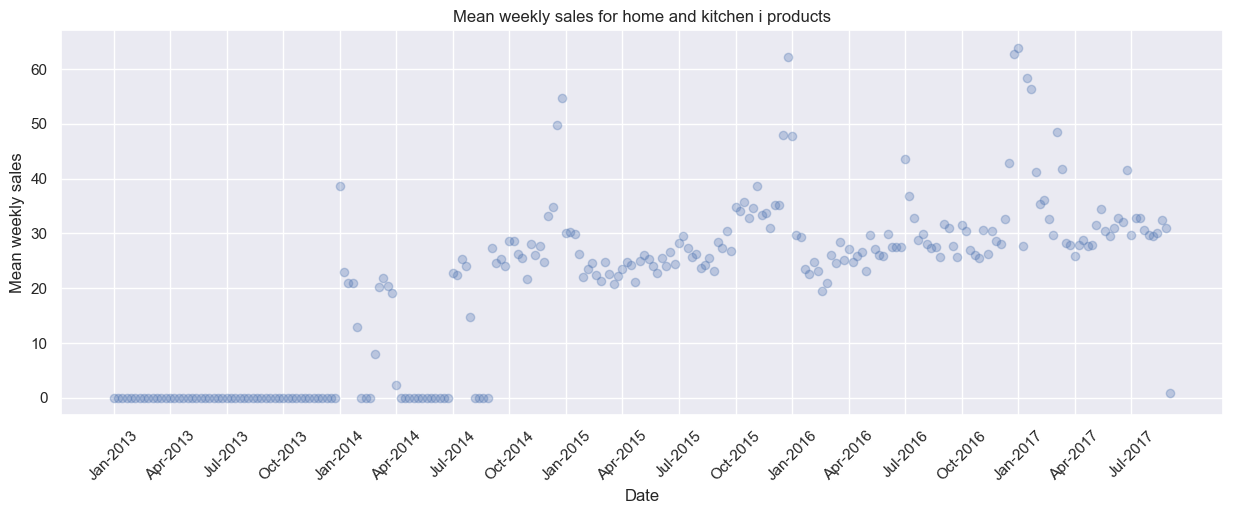

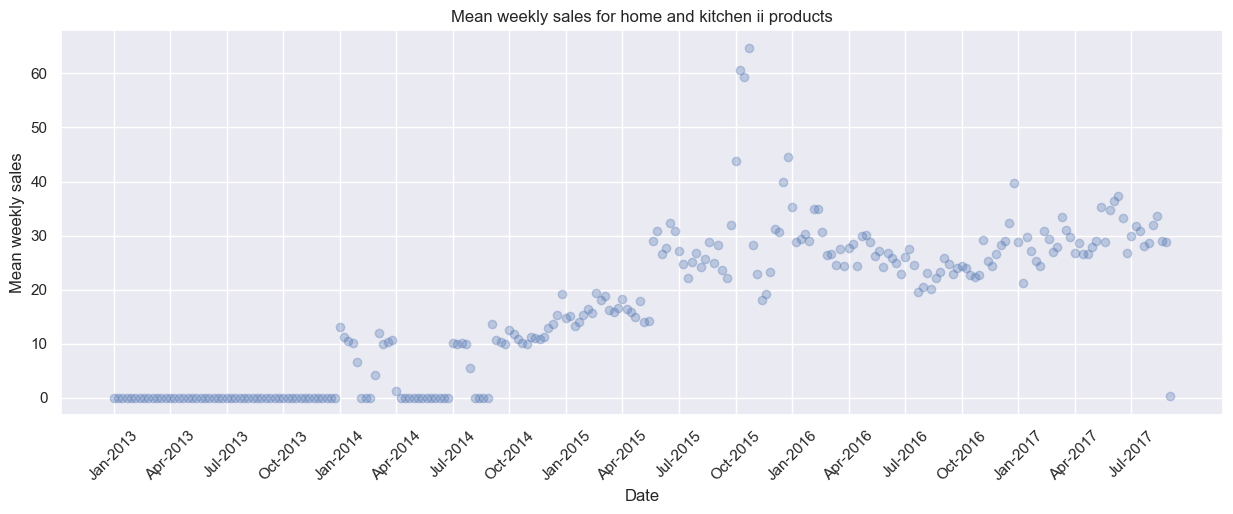

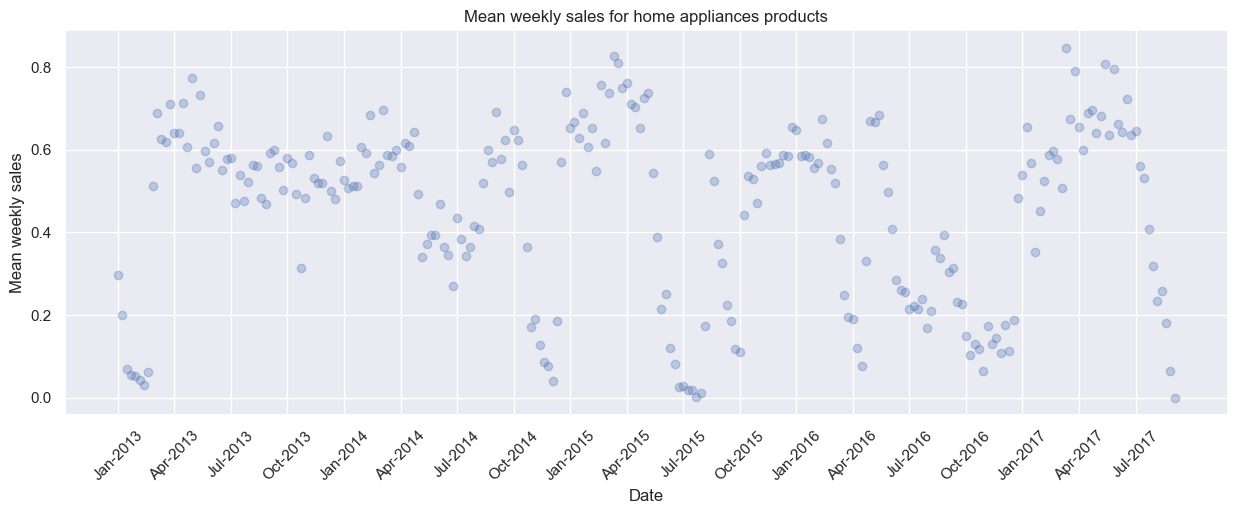

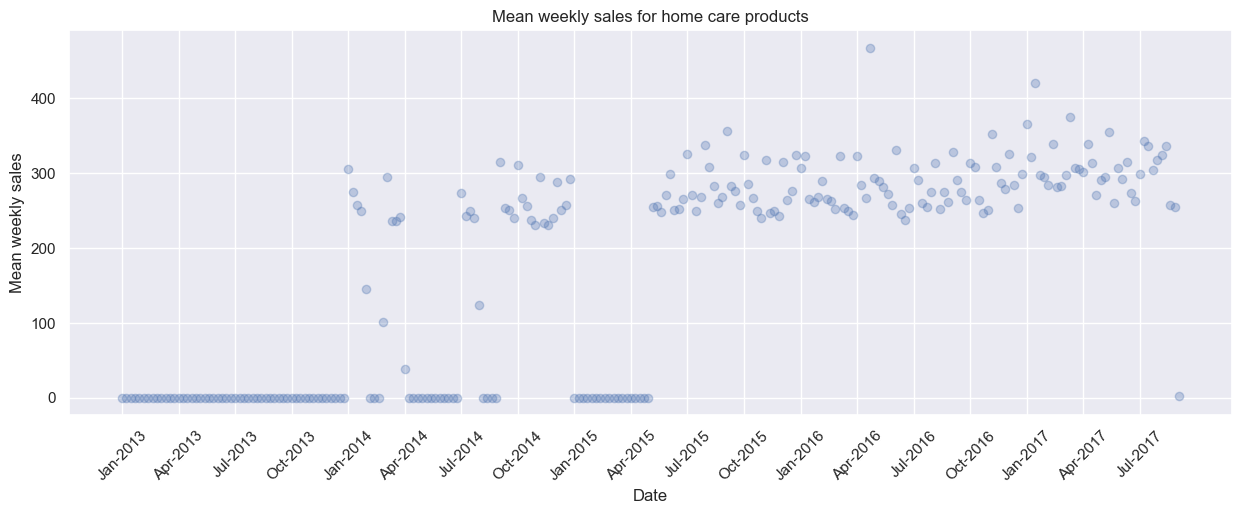

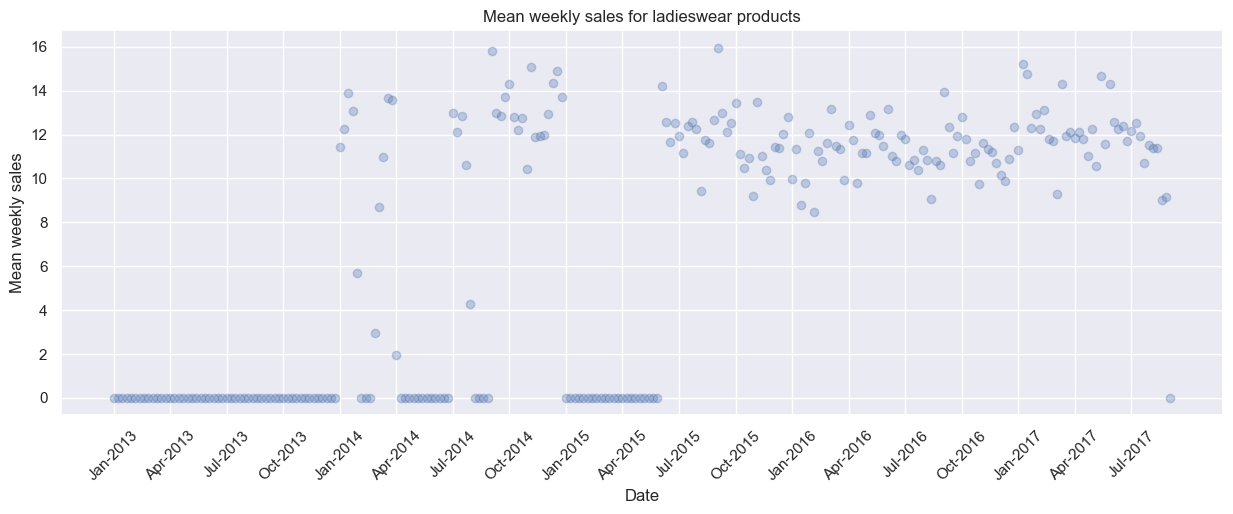

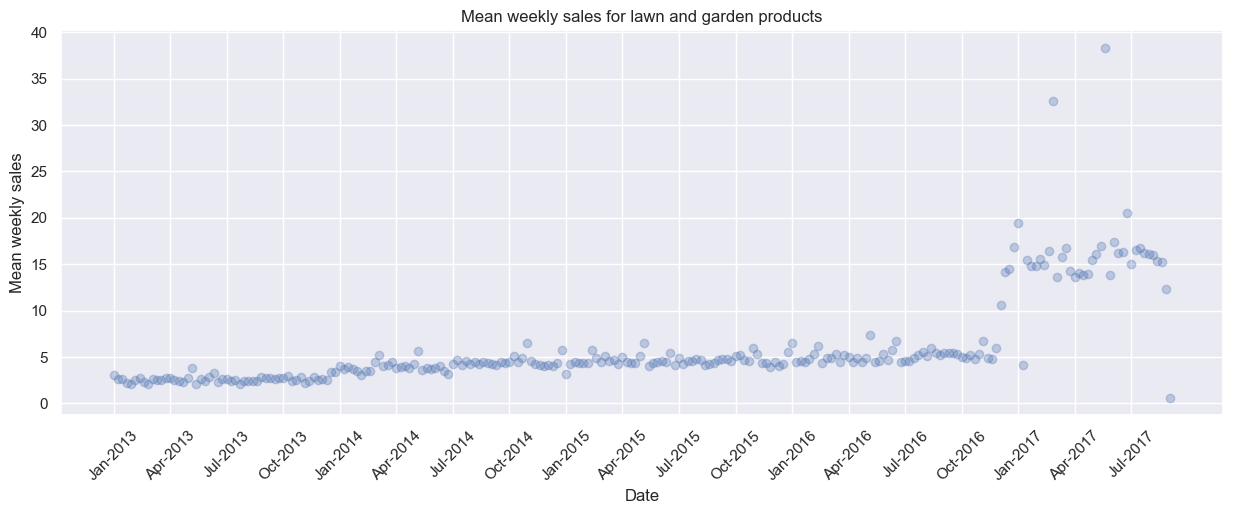

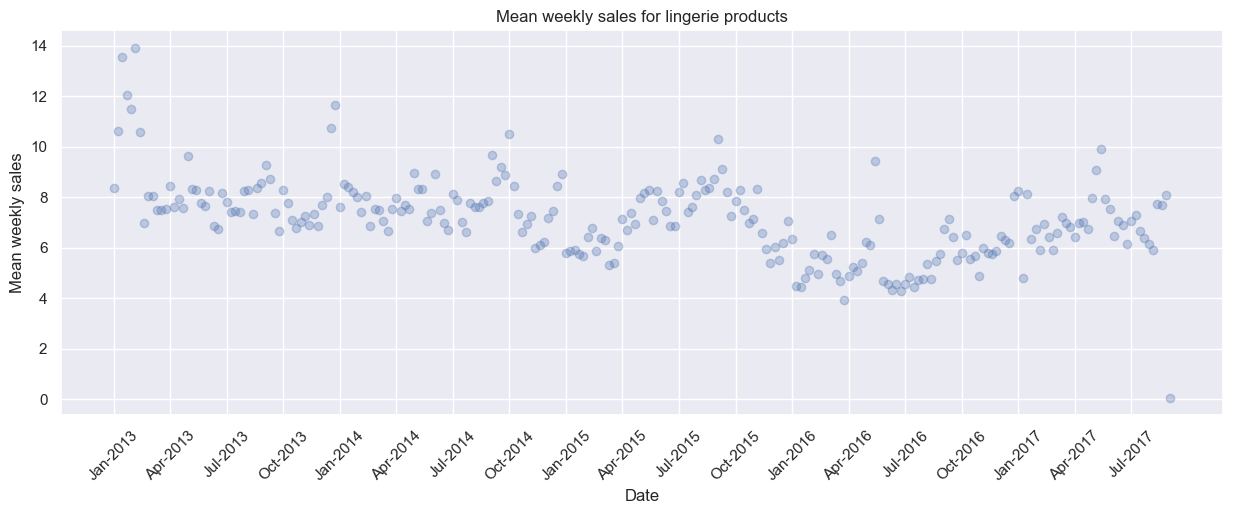

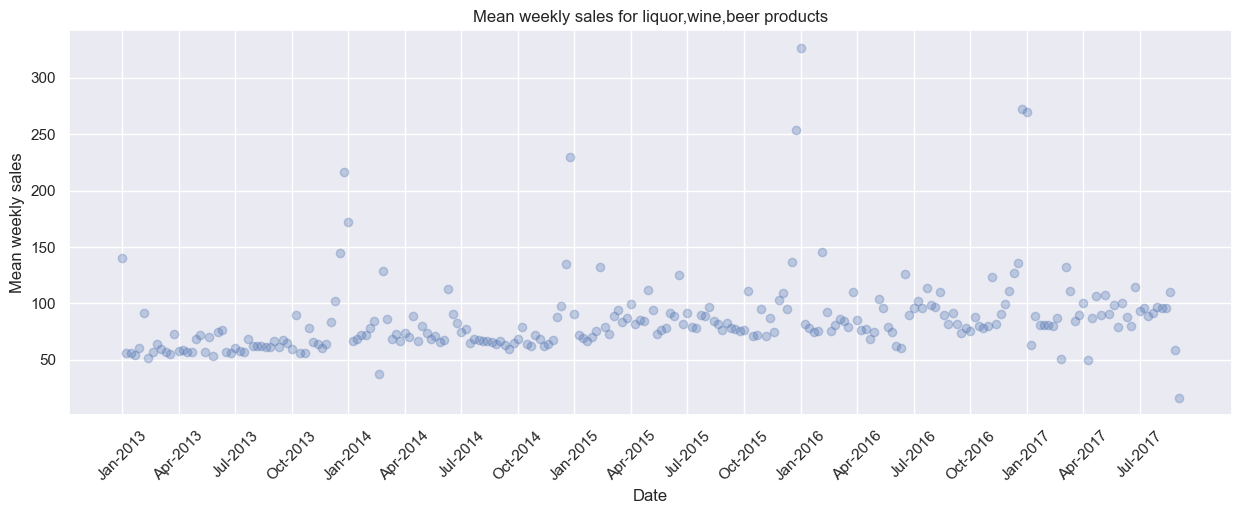

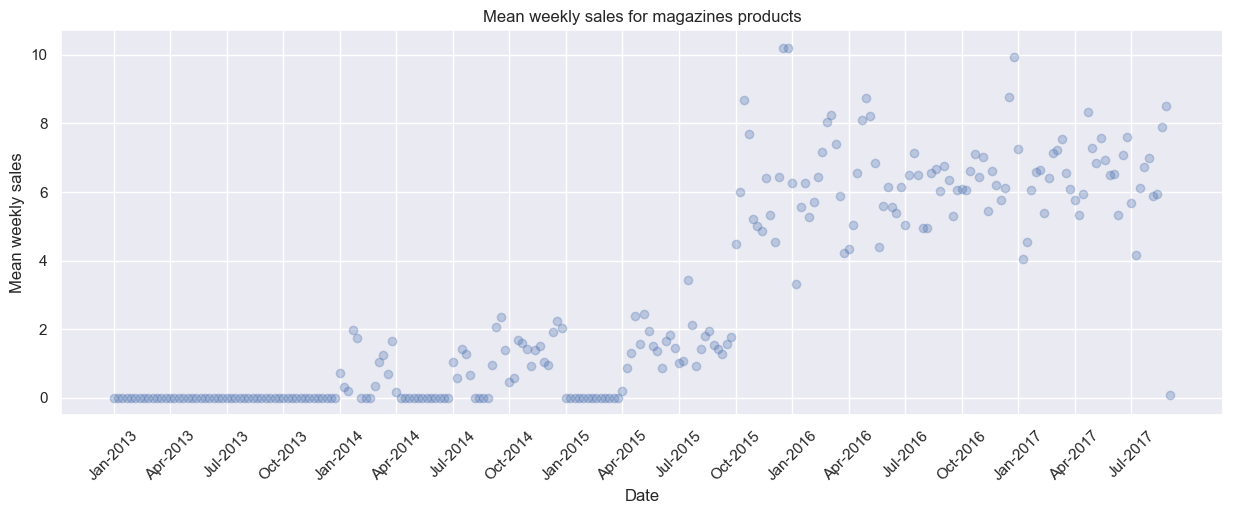

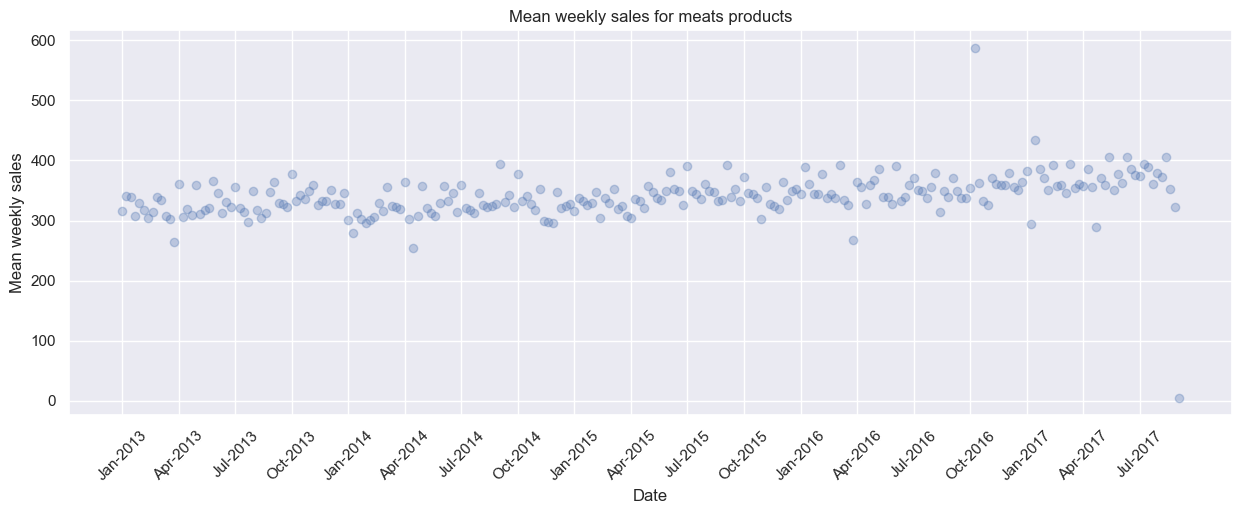

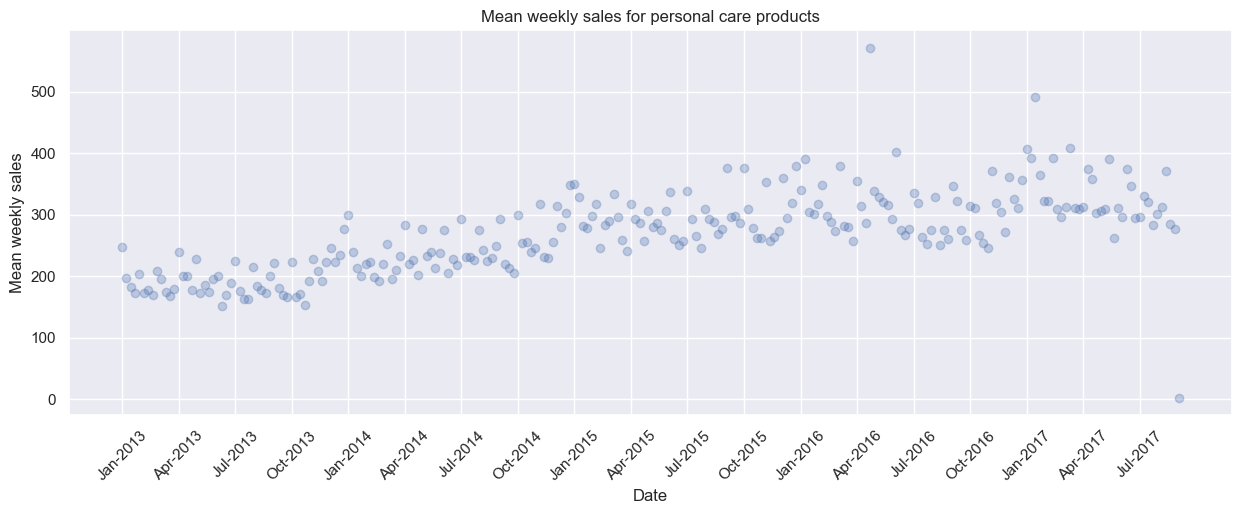

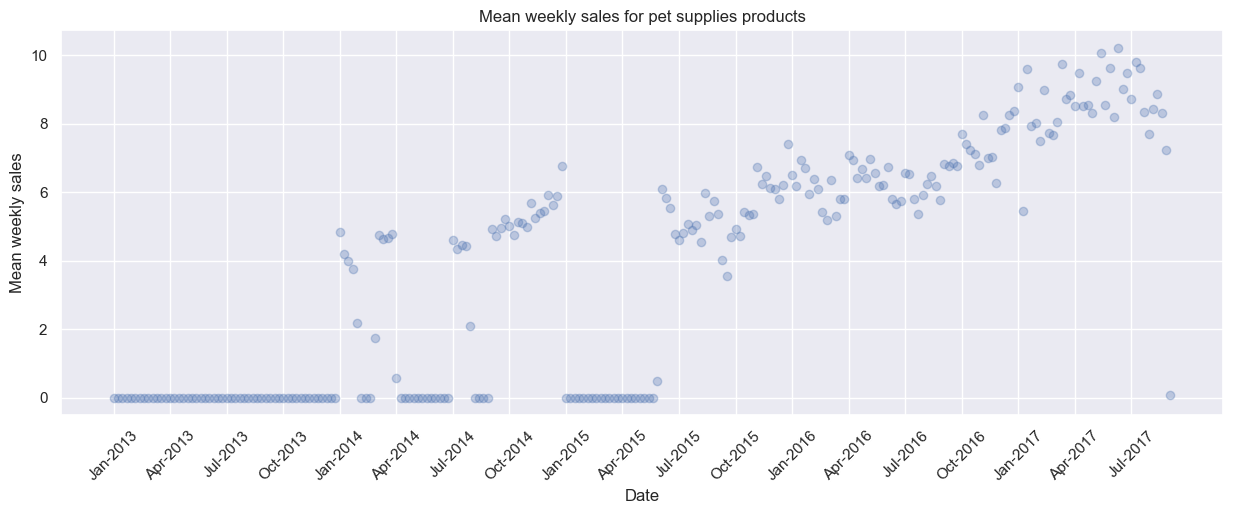

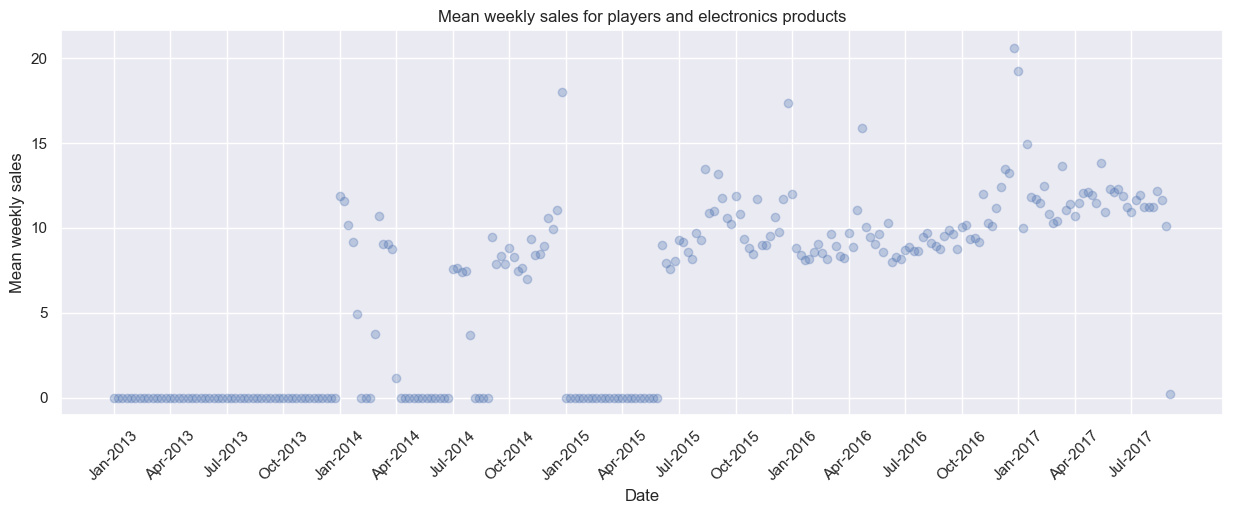

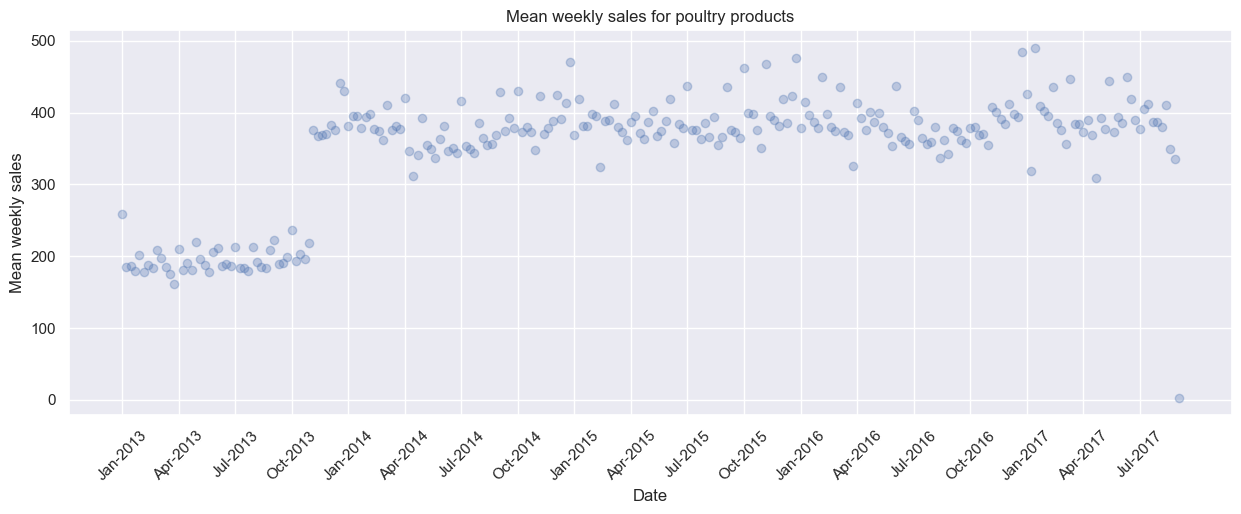

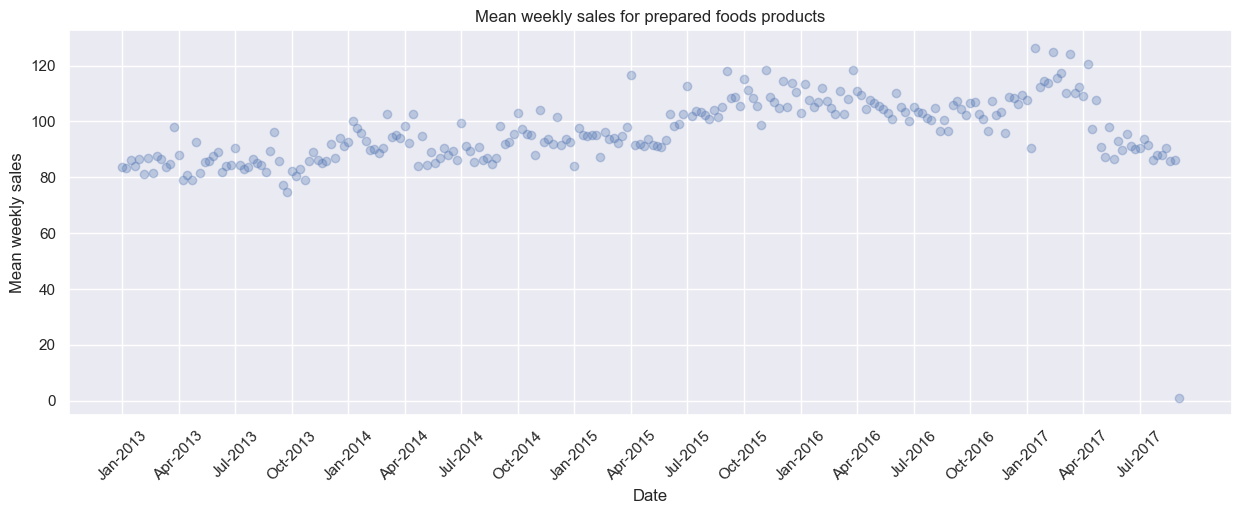

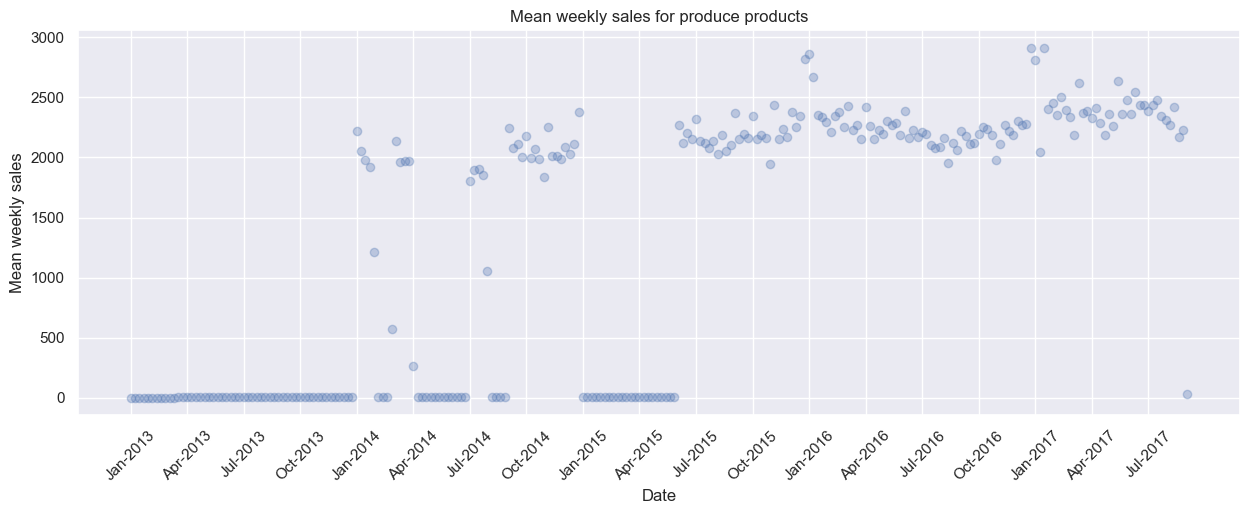

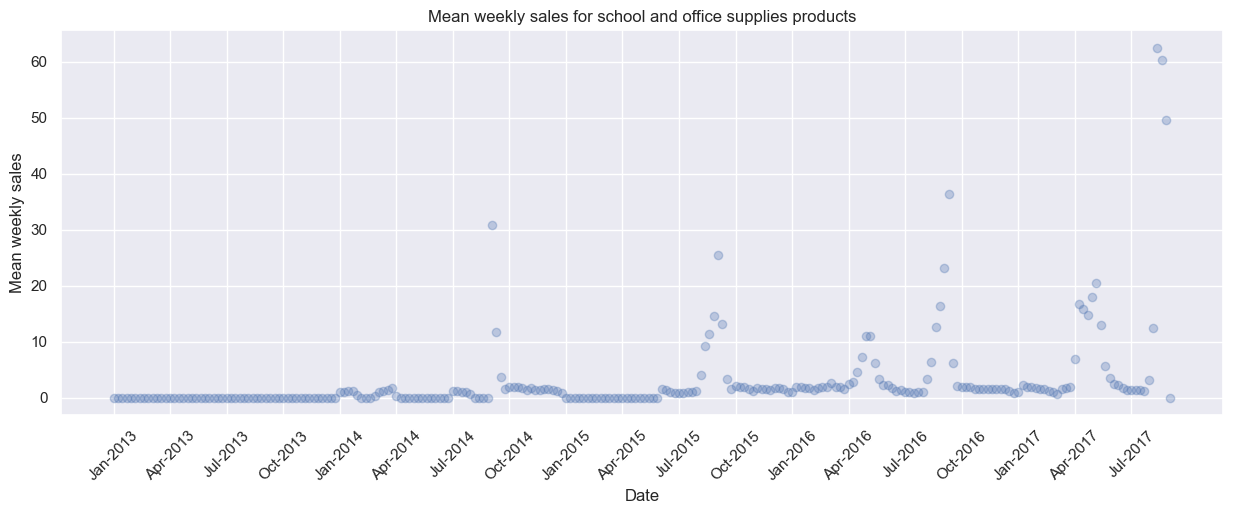

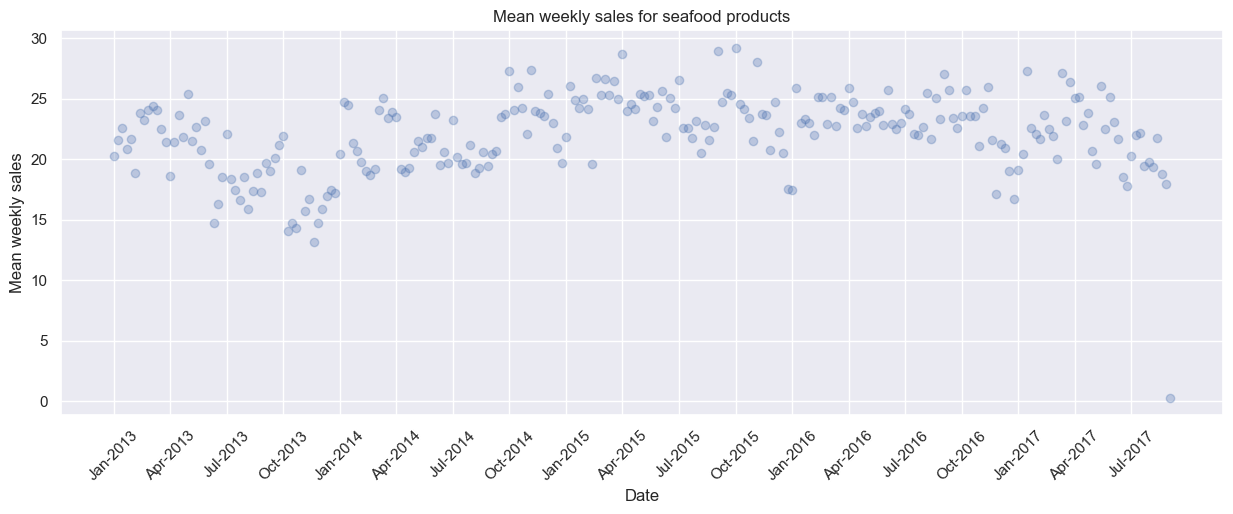

In [135]:
mean_weekly_sales_by_family()

### Next